In [40]:
%matplotlib inline

In [41]:
from __future__ import print_function
import os

In [42]:
import ROOT
import h5py

In [85]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

In [53]:
from uncertainties import ufloat, unumpy
import pint
ureg = pint.UnitRegistry()

In [54]:
TYPE = 14
NAME = r't_gevgen_{0}'.format(TYPE)
DIR = '/data/mandalia/NuTeV'
CACHE = DIR+'/cache.hdf5'
Y_BINNING = np.array([0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.97, 1.0])
X_BINNING = np.array([0.0001, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
E_BINNING = np.array([30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 230, 260, 290, 320, 360])
Y_CENTERS = np.array([0.0005, 0.026, 0.075, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.935, 0.985])
X_CENTERS = np.array([0.015, 0.045, 0.08, 0.125, 0.175, 0.225, 0.275, 0.35, 0.45, 0.55, 0.65, 0.75])
E_CENTERS = np.array([35, 45, 55, 65, 75, 85, 95, 110, 130, 150, 170, 190, 215, 245, 275, 305, 340])
print(map(len, (Y_BINNING, X_BINNING, E_BINNING)))
IRON_MASS = 56 * ureg.u

[14, 13, 18]


In [46]:
is_cache = False
if os.path.isfile(CACHE):
    is_cache = True
print(is_cache)
if not is_cache:
    infiles = []
    for file_name in os.listdir(DIR):
        file_path = DIR + '/' + file_name
        if os.path.isfile(file_path) and (file_path.endswith('.gst.root')):
            infiles.append(ROOT.TFile(file_path))
else:
    h5file = h5py.File(CACHE, 'r')
    for key in h5file.iterkeys():
        locals().update(dict([(key, np.array(h5file[key][:]))]))
    h5file.close()

False


In [18]:
def cache_events(in_arrays):
    h5file = h5py.File(CACHE, 'w')
    inarr_dict = dict(zip(STR_R, in_arrays))
    for key in inarr_dict.iterkeys():
        h5file.create_dataset(key, data=inarr_dict[key])
    h5file.close()

In [52]:
STR_R = ['pdg_array', 'energy_array', 'y_array', 'x_array', 'dis_array', 'q2_array']
if not is_cache:
    pdg_array, energy_array, y_array, x_array, dis_array, q2_array = [], [], [], [], [], []
    for r_file in infiles:
        print(r_file)
        for event in r_file.gst:
            pdg_array.append(event.neu)
            energy_array.append(event.Ev)
            y_array.append(event.y)
            x_array.append(event.x)
            dis_array.append(event.dis)
            q2_array.append(event.Q2)
    pdg_array, energy_array, y_array, x_array, dis_array, q2_array = \
        map(np.array, (pdg_array, energy_array, y_array, x_array, dis_array, q2_array))
    cache_events((pdg_array, energy_array, y_array, x_array, dis_array, q2_array))
nu_mask = pdg_array > 0
nubar_mask = pdg_array < 0
print(xsec_array)
print(xsec_array.shape)

<ROOT.TFile object ("/data/mandalia/NuTeV/nutev_nu_65.gst.root") at 0x225c770>
<ROOT.TFile object ("/data/mandalia/NuTeV/nutev_nu_245.gst.root") at 0x6b6f680>
<ROOT.TFile object ("/data/mandalia/NuTeV/nutev_antinu_65.gst.root") at 0x6b7d570>
<ROOT.TFile object ("/data/mandalia/NuTeV/nutev_antinu_245.gst.root") at 0x6b7ec30>
<ROOT.TFile object ("/data/mandalia/NuTeV/nutev_nu_150.gst.root") at 0x6b844e0>
<ROOT.TFile object ("/data/mandalia/NuTeV/nutev_antinu_150.gst.root") at 0x6b71950>
[  1.01111402e-36   1.41518553e-35   2.89992882e-37 ...,   1.33057245e-36
   3.59162321e-36   1.86616098e-36]
(600000,)


[ 1.28187827  1.41279385  1.16797873 ...,  1.21387222  1.11364917
  0.96303244]
[ 0.0388194   0.01468009  0.09843902 ...,  0.0669556   0.15850125
  0.67780925]
[ 0.60842666  0.759305    0.41330078 ...,  0.65796305  0.98212573
  0.31454783]
1.11917152146


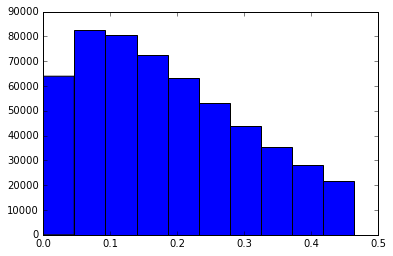

In [137]:
#weights = np.ones(len(pdg_array))
a = 0.1
b = 0.9263
weights = np.power(x_array, -a) * b
print(weights)
#plt.hist(weights)
print(x_array)
print(y_array)
plt.hist(x_array[weights>1])
print(np.sum(weights) / len(weights))

In [145]:
def make_plot(hist, asd, binning, outname):
    fig = plt.figure(figsize=[10, 7])

    ax0 = fig.add_subplot(111)
    ax0.set_xlabel(r'Energy (GeV)', size=18)
    ax0.set_xlim(np.min(binning), np.max(binning))
    #ax0.set_ylim([0, 6])
    for xmaj in ax0.xaxis.get_majorticklocs():
        ax0.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    for ymaj in ax0.yaxis.get_majorticklocs():
        ax0.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    ax0.set_ylabel('N', size=18)
    
    hist_0 = np.concatenate(([hist[0]], hist))
    asd_0 = np.concatenate(([asd[0]], asd))
    ax0.step(
        binning, hist_0, alpha=0.8, color='black', drawstyle='steps-mid', label='all', linewidth=2, linestyle=':'
    )
    ax0.step(
        binning, asd_0, alpha=0.8, color='red', drawstyle='steps-mid', label='all', linewidth=2, linestyle=':'
    )

    fig.tight_layout()
    # fig.savefig('./test.pdf', bbox_inches='tight')
    #fig.savefig(outname, bbox_inches='tight')

[  2.88289176   1.36055552   4.96597847 ...,  12.40902409  43.84791939
  60.0542024 ]
[ 1.28187827  1.41279385  1.16797873 ...,  1.21387222  1.11364917
  0.96303244]
[  65.   65.   65. ...,  150.  150.  150.]
[  25.45226684   15.64517529   38.13544937 ...,   51.30554307    2.68114048
  102.8178259 ]
1.06505499704


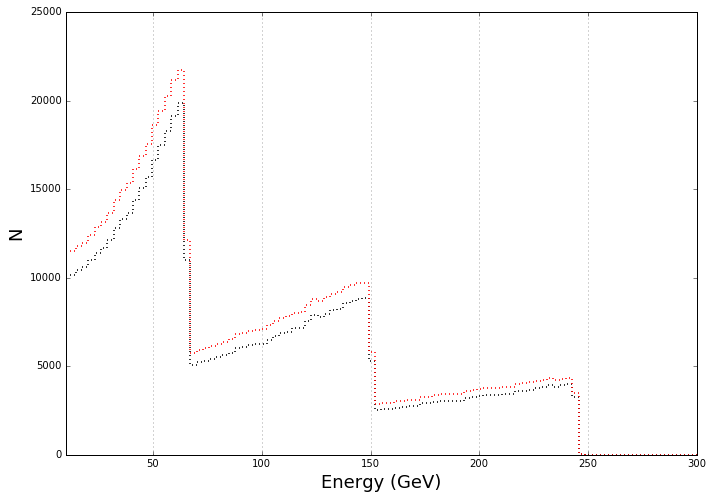

In [146]:
binning = np.linspace(10, 300, 100)

x_array_w = x_array * weights
print(q2_array)
energy_calc = q2_array * (1-y_array) / (2 * y_array / 1.06505499704 * x_array)
print(weights)
print(energy_array)
print(energy_calc)

hist, edges = np.histogram(
    energy_calc, bins=binning
)
make_plot(hist, hist_w, binning, 'asd.png')
hist_w, edges = np.histogram(
    energy_calc, bins=binning, weights=weights
)
#make_plot(hist_w, binning, 'asd.png')
print(150 / 140.8377975)
#print(65 / 61.02971225)